In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_white, het_breuschpagan, het_goldfeldquandt
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as sm_diagnostic
import statsmodels.stats.stattools as sm_tools
import scipy.stats as stats
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from stargazer.stargazer import Stargazer
import pyreadstat
from pandas.plotting import scatter_matrix
import seaborn as sns
from statsmodels.stats.outliers_influence import  variance_inflation_factor as vif
from scipy.stats import chi2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# file_path_1 = "r28i_os_73.sav"#2019
# df_1, meta = pyreadstat.read_sav(file_path_1)
# output_csv = "econometric_2019.csv"
# df_1.to_csv(output_csv, index=False)
# file_path_2="r23i_os_73.sav"#2014
# df_2, meta = pyreadstat.read_sav(file_path_2)
# output_csv = "econometric_2014.csv"
# df_2, meta = pyreadstat.read_sav(file_path_2)
# df_2.to_csv(output_csv, index=False)

In [3]:
df_1=pd.read_csv("econometric_2019.csv")
df_2=pd.read_csv("econometric_2014.csv")

In [4]:
df_1=df_1.copy()

In [5]:
df_2019=df_1[(df_1['region']==136) | (df_1['region']==138)]
df_2019

,idind,xredid_i,xid_i,xid_h,wid_i,wid_h,vid_i,vid_h,uid_i,uid_h,...,xm101,xm102,xm103,xm104,xm105,xm106,xm107,xm108,xm109,xm111
1254,9041.0,111104.0,1.360007e+08,1360007.0,136000704.0,1360007.0,NaN,NaN,136000704.0,1360007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,9061.0,107904.0,1.360023e+08,1360023.0,136002304.0,1360023.0,136002304.0,1360023.0,136002304.0,1360023.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,9063.0,506201.0,1.360024e+08,1360024.0,136002401.0,1360024.0,136002401.0,1360024.0,136002401.0,1360024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,9064.0,506202.0,1.360024e+08,1360024.0,136002402.0,1360024.0,136002402.0,1360024.0,136002402.0,1360024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1258,9068.0,506206.0,1.360024e+08,1360024.0,136002406.0,1360024.0,136002406.0,1360024.0,136002406.0,1360024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12185,59369.0,680305.0,1.389002e+09,13890024.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12186,59370.0,680306.0,1.389002e+09,13890024.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12187,59371.0,680401.0,1.389003e+09,13890025.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12188,59372.0,680501.0,1.389003e+09,13890026.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#df.isna().sum(axis=0).apply(lambda x: x>90).sum()
#print(list(df_2019.columns))

In [7]:
###xj13.2 - среднемесячная зп за последние 12 месяцев
###region
###xh5 - пол
###j72.171 - у вас есть дети
###x_age - возраст респондент
###X_diplom - образование менее подробно (законченное)
###J4.1 - в какой сфере вы работаете
###J161.3Y(xj161.3y) - стаж в годах


#
#,'xj11.1'
#x_occup08 - профессиональная группа (слишком сложнаа)
#J7.1 - число рабочих дней за последние 30 лет
#'x_educ' - образование подробно по классам
#j6.1a - сколько в среднем продалжается рабочий день часов/минут
#xj262 - в какой степени вы владеете иностранным языком
#x_marst - семейное положение (слишком подробно)
#xj2cod08 - код профессии
#xj10 - сколько получили за последний месяц
#xj29 - какой трудовой деятельностью вы занимаетесь(предприниматель и тд)

In [8]:
df_2019['xj21.3'].isna().sum()
# #df_2019['xj29ё']

832

In [9]:
df=df_2019[['xj13.2','region','xh5','x_marst','xj72.171','x_age','x_diplom','xj4.1','xj161.3y','xj8','xj6','x_occup08','xj260','xm3','xj26']]
df=df.rename(columns={"xj13.2": "income", "xh5": "sex", 'x_marst':'married',"xj72.171": "children","x_age":"age","x_diplom":"education",
                     "xj161.3y":"experience",'xj8':'hours','xj6':'subordinates','x_occup08':'profession','xj260':'foreign_language','xm3':'health',
                     'xj4.1':'working_sphere','xj26':'own_firm'})
df=df.dropna()
values_to_remove = {99999996.0, 99999997.0, 99999998.0, 99999999.0}
df = df[~df.apply(lambda row: any(value in values_to_remove for value in row), axis=1)]
df['region'] = df['region'].replace({136: 0, 138: 1})# Москва - 1
df['sex'] = df['sex'].replace({1: 1, 2: 0})
df['children'] = df['children'].replace({1: 1, 2: 0})
df['subordinates'] = df['subordinates'].replace({2: 0, 1: 1})
df['foreign_language'] = df['foreign_language'].replace({1: 1, 2: 0})
df['married'] = df['married'].replace({1: 0, 2:1,3:0,4:0,5:0,6:0,7:1})
df['children'] = df['children'].replace({1: 1, 2: 0})
df['education']=df['education'].replace({1: 'middle_school',2:'unfinished_middle',3:'finished_middle',4:'finished_college',5:'finished_special_college',
                                         6:'higher'})
df['own_firm'] = df['own_firm'].replace({1: 1, 2: 0})
#df['danger_product'] = df['danger_product'].replace({1: 1, 2: 0})
#df['education']=df['education'].replace({1: 'no_higher',2:'no_higher',3:'no_higher',4:'no_higher',5:'no_higher',6:'higher'})#остальное не значимо оказалось
df = pd.get_dummies(df, dtype = float)
#df=df.drop(['education_no_higher'],axis=1)
df

,income,region,sex,married,children,age,working_sphere,experience,hours,subordinates,profession,foreign_language,health,own_firm,education_finished_college,education_finished_middle,education_finished_special_college,education_higher,education_unfinished_middle
1255,100000.0,0.0,1.0,1.0,1.0,40.5,14.0,18.0,176.0,1.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
1258,20000.0,0.0,1.0,0.0,0.0,36.0,7.0,5.0,192.0,0.0,8.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1260,30000.0,0.0,0.0,0.0,0.0,28.5,15.0,8.0,176.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
1279,40000.0,0.0,1.0,1.0,1.0,58.0,3.0,32.0,108.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1280,16000.0,0.0,0.0,1.0,1.0,61.0,10.0,46.0,168.0,0.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12155,110000.0,1.0,1.0,1.0,1.0,42.5,14.0,20.0,120.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
12165,40000.0,1.0,0.0,1.0,1.0,32.5,14.0,10.0,128.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
12167,40000.0,1.0,0.0,1.0,1.0,43.0,14.0,5.0,90.0,0.0,5.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
12178,19500.0,1.0,0.0,0.0,1.0,41.5,30.0,19.0,176.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
df.astype(float).describe().T

,count,mean,std,min,25%,50%,75%,max
income,395.0,44918.632911,27221.479158,0.0,30000.0,40000.0,55000.0,190000.0
region,395.0,0.827848,0.377991,0.0,1.0,1.0,1.0,1.0
sex,395.0,0.422785,0.494628,0.0,0.0,0.0,1.0,1.0
married,395.0,0.541772,0.498884,0.0,0.0,1.0,1.0,1.0
children,395.0,0.731646,0.443665,0.0,0.0,1.0,1.0,1.0
age,395.0,43.753165,12.266984,19.0,33.5,43.5,53.0,80.5
working_sphere,395.0,11.648101,5.834887,1.0,7.0,12.0,14.0,31.0
experience,395.0,20.936709,12.710903,0.0,11.0,19.0,30.0,62.0
hours,395.0,168.377215,49.094667,12.0,160.0,176.0,184.0,360.0
subordinates,395.0,0.207595,0.406099,0.0,0.0,0.0,0.0,1.0


In [13]:
#df_ln=df
#df_ln['income']=np.log(df_ln['income'])

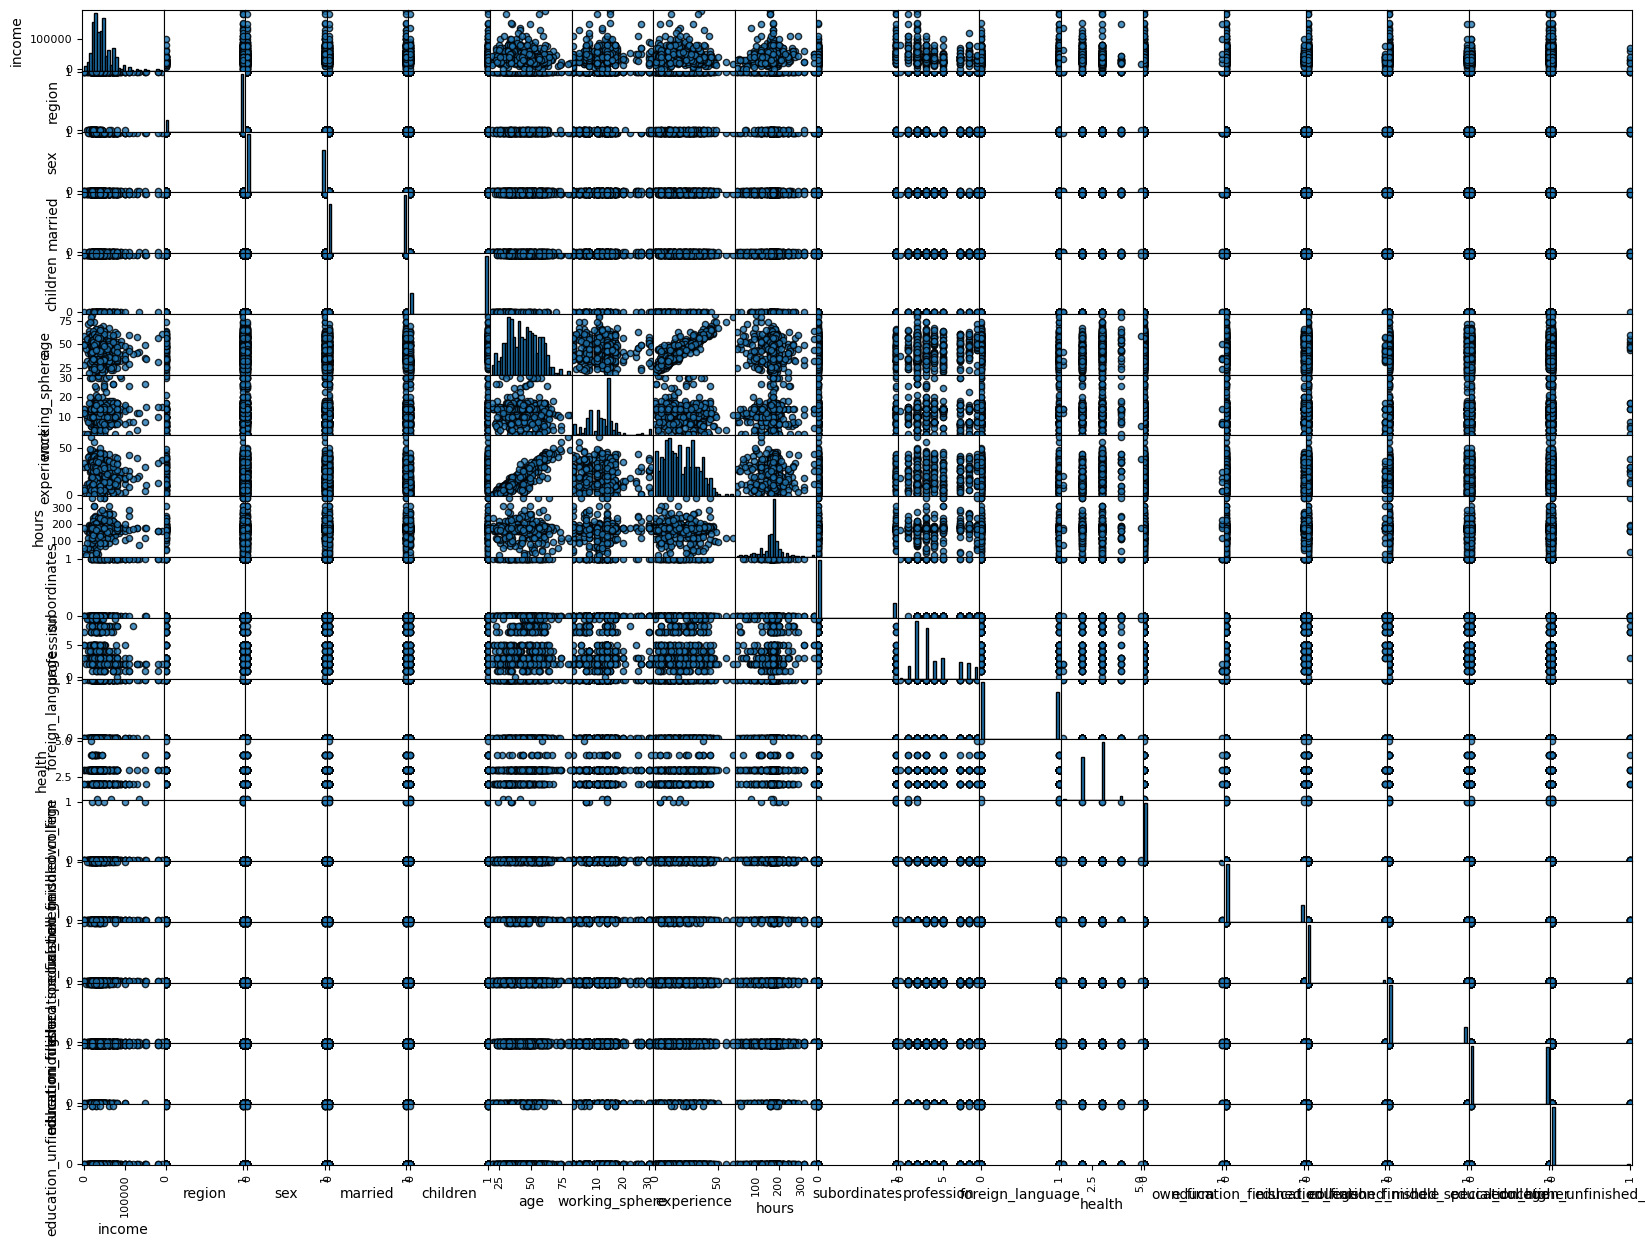

In [14]:
scatter_matrix(df,  # Pass the DataFrame, not df.columns
               alpha=0.8,
               figsize=(20, 15),
               marker="o",
               hist_kwds={'edgecolor': "black", 'linewidth': 1, 'bins': 30},
               diagonal='hist',edgecolors="black",s=20)  # Added 'diagonal' argument
plt.show()

по графику заметна линейная зависимость между age и experience. Их стоит проверить на коррелированность. Также стоит избавиться от выбросов в зп, опыте и возрасте

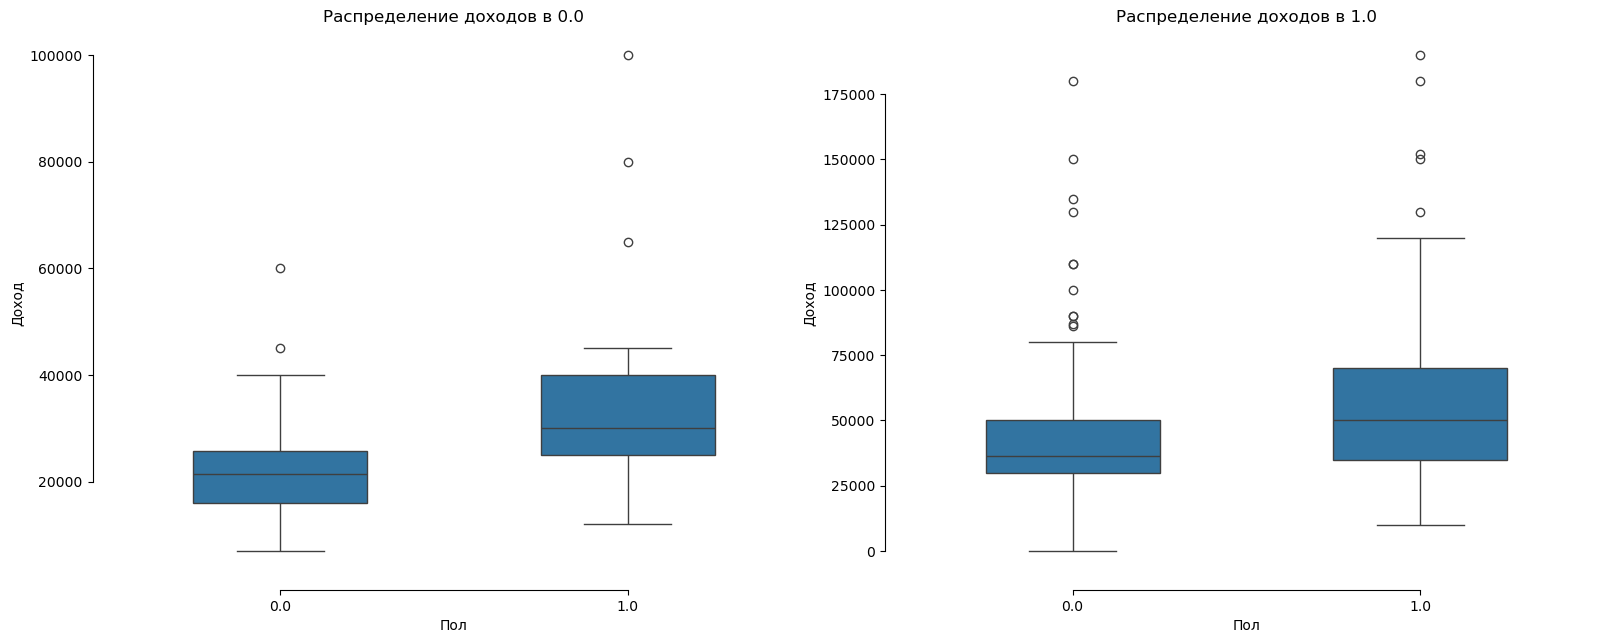

In [18]:
regions = df['region'].unique()
# Set up the subplots
plt.figure(figsize=(16, 12))
for i, region in enumerate(regions):
    plt.subplot(2, 2, i + 1)  # Adjust grid layout as needed (e.g., 2x2 for 4 regions)
    region_data = df[df['region'] == region]  # Filter data for the current region
    
    sns.boxplot(x='sex', y='income', data=region_data, width=0.5)
    
    # Add title and labels
    plt.title(f'Распределение доходов в {region}')
    plt.xlabel('Пол')
    plt.ylabel('Доход')

# Adjust layout and clean up
plt.tight_layout()
sns.despine(offset=10, trim=True)
plt.show()

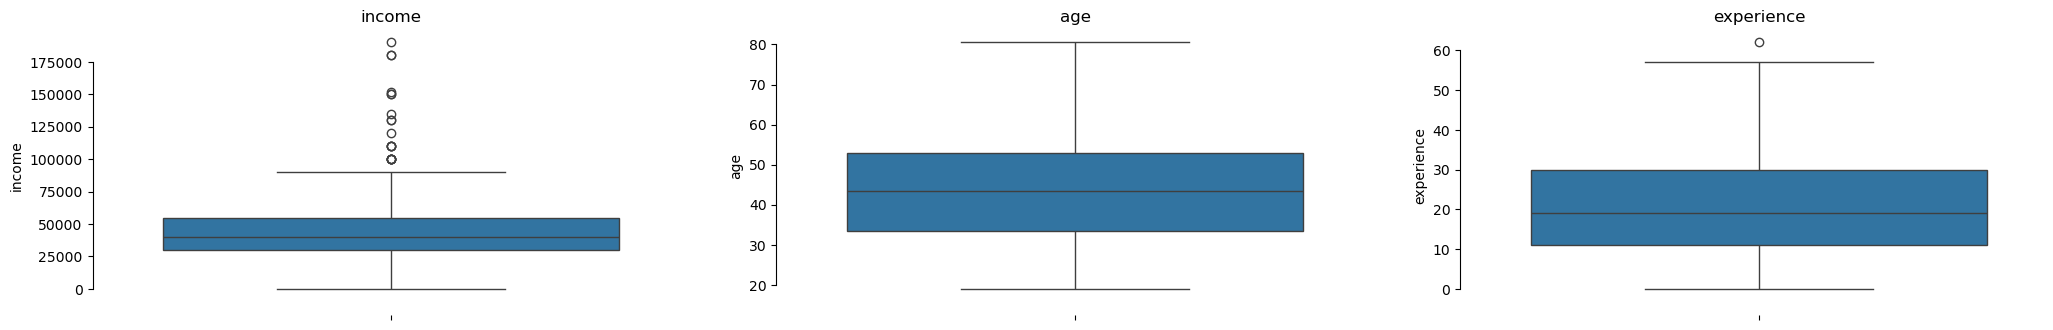

In [19]:
plt.figure(figsize=(25,50))
continuous=df[['income','age','experience']]
for ind, col_name in enumerate(continuous.columns):
  plt.subplot(12,3,ind+1)
  ax=sns.boxplot(y = col_name, data=df)
  plt.title(str(col_name))
sns.despine(offset=10, trim=True)

работа с выбросами

In [21]:
#есть достаточно много 
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['income'] >= lower_bound) & (df['income'] <= upper_bound)]
df=df[(df['income'] >= 10000)]

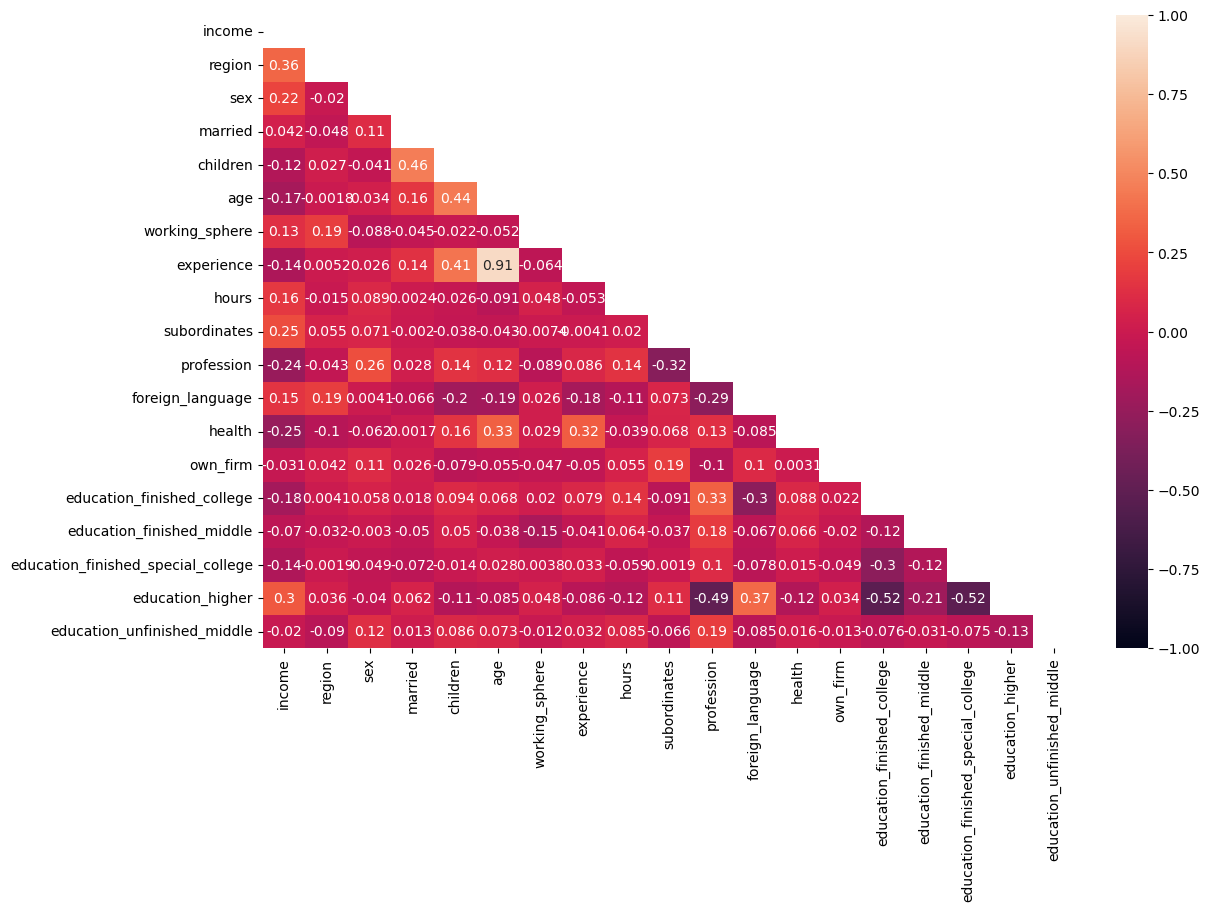

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 9), constrained_layout=True)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot = True, mask = mask, vmax = 1, vmin = -1)
plt.show()

In [31]:
#from scipy.stats import chi2_contingency, fisher_exact
#contingency_table = pd.crosstab(df['education'], df['official or not'])

# Расчёт коэффициента Крамера V
#chi2, p, dof, expected = chi2_contingency(contingency_table)
#n = contingency_table.sum().sum()
#phi2 = chi2 / n
#r, k = contingency_table.shape
#cramers_v = np.sqrt(phi2 / min(k-1, r-1))
#print("Коэффициент Крамера V:", cramers_v)

In [33]:

#vif тест только с константой (т.е оцененная модель)

# Строим модели линейную модель

In [35]:
income_nonlog = df['income']
factors_all_1 = sm.add_constant(df.drop(columns = ['income'])).astype(float)
res_all_1 = sm.OLS(income_nonlog, factors_all_1).fit()
print(res_all_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     14.32
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           5.53e-31
Time:                        10:49:22   Log-Likelihood:                -4032.0
No. Observations:                 368   AIC:                             8100.
Df Residuals:                     350   BIC:                             8170.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [36]:
#получили фичи, по которым не значимо (в итого получилось, что логичнее сделать дамми-переменную для образования (0,1)
factors_all_2 = sm.add_constant(df.drop(columns = ['income','education_finished_middle'])).astype(float)
res_all_2 = sm.OLS(income_nonlog, factors_all_2).fit()
print(res_all_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     14.32
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           5.53e-31
Time:                        10:49:22   Log-Likelihood:                -4032.0
No. Observations:                 368   AIC:                             8100.
Df Residuals:                     350   BIC:                             8170.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [46]:
res_all_2.f_test('education_finished_special_college = 0,education_finished_college=0')
#эти фичи мультиколлинеоарны (по отдельности не значимы, в сумме значимы) поэтому логично разделить на наличие/отсутсвие высшего образования

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.4226309343130416, p=0.6556544246996162, df_denom=350, df_num=2>

In [48]:
#
df=df.drop(['education_finished_college','education_finished_special_college','education_unfinished_middle','education_finished_middle'],
           axis=1)
df

,income,region,sex,married,children,age,working_sphere,experience,hours,subordinates,profession,foreign_language,health,own_firm,education_higher
1258,20000.0,0.0,1.0,0.0,0.0,36.0,7.0,5.0,192.0,0.0,8.0,0.0,2.0,0.0,0.0
1260,30000.0,0.0,0.0,0.0,0.0,28.5,15.0,8.0,176.0,0.0,2.0,0.0,2.0,0.0,1.0
1279,40000.0,0.0,1.0,1.0,1.0,58.0,3.0,32.0,108.0,0.0,3.0,0.0,2.0,0.0,0.0
1280,16000.0,0.0,0.0,1.0,1.0,61.0,10.0,46.0,168.0,0.0,2.0,0.0,3.0,0.0,0.0
1312,50000.0,1.0,0.0,1.0,0.0,31.0,9.0,12.0,168.0,0.0,3.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12154,40000.0,1.0,0.0,0.0,1.0,64.5,12.0,45.0,144.0,0.0,3.0,1.0,3.0,0.0,0.0
12165,40000.0,1.0,0.0,1.0,1.0,32.5,14.0,10.0,128.0,0.0,3.0,0.0,2.0,0.0,1.0
12167,40000.0,1.0,0.0,1.0,1.0,43.0,14.0,5.0,90.0,0.0,5.0,1.0,3.0,0.0,0.0
12178,19500.0,1.0,0.0,0.0,1.0,41.5,30.0,19.0,176.0,0.0,2.0,1.0,2.0,0.0,1.0


In [50]:
factors_all_3 = sm.add_constant(df.drop(columns = ['income'])).astype(float)
res_all_3 = sm.OLS(income_nonlog, factors_all_3).fit()
print(res_all_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     17.32
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.86e-32
Time:                        10:49:25   Log-Likelihood:                -4032.9
No. Observations:                 368   AIC:                             8096.
Df Residuals:                     353   BIC:                             8154.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.727e+04   6493.756  

In [52]:
#age и experience коррелируют, но при этом age сильно значимей, чем experience.
#откидываем незначимые переменные (при этом married может отличаться от пола, поэтому пока оставим)
factors_all_4 = sm.add_constant(df.drop(columns = ['income','experience','health','working_sphere','married'])).astype(float)
res_all_4 = sm.OLS(income_nonlog, factors_all_4).fit()
print(res_all_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     22.65
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           8.64e-33
Time:                        10:49:26   Log-Likelihood:                -4038.7
No. Observations:                 368   AIC:                             8099.
Df Residuals:                     357   BIC:                             8142.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.079e+04   4891.906  

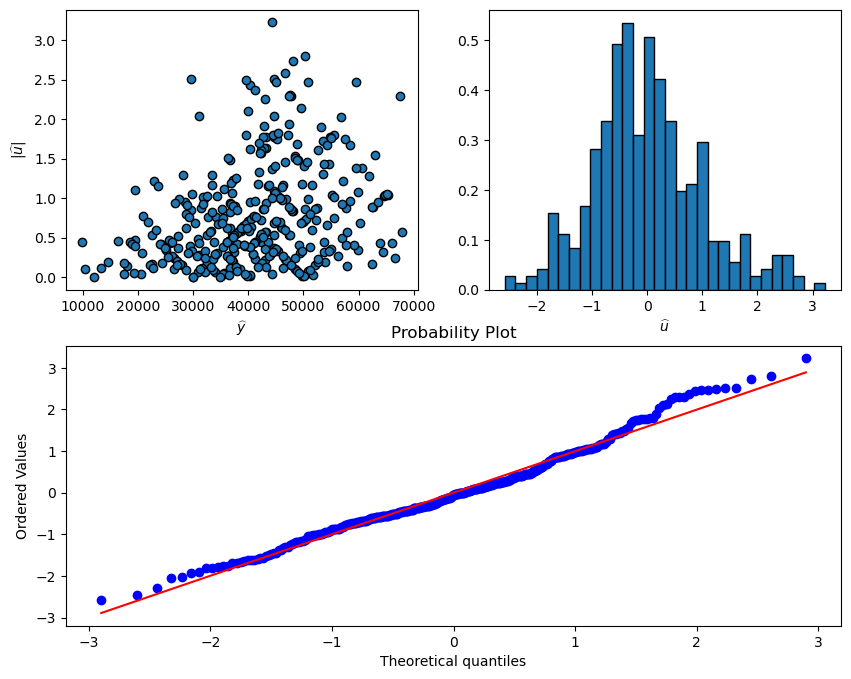

In [56]:
fig = plt.figure(num = 2, figsize = (10, 8))

# graphical analysis of heteroskedasticity:
# Scatterplot of standardized residuals relative to dependent variable
influence_4 = res_all_4.get_influence()
st_residuals_4 = influence_4.resid_studentized_internal

ax = fig.add_subplot(2, 2, 1)
ax.plot(res_all_4.fittedvalues, np.abs(st_residuals_4), linestyle = "None", marker = "o", markeredgecolor = "black")
ax.set_xlabel('$\widehat{y}$')
ax.set_ylabel('$|\widehat{u}|$')

ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_4, bins = 30, edgecolor = "black", density = True)
ax.set_xlabel('$\widehat{u}$')

ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_4, dist = "norm", plot = ax)

plt.show()

Первый график показывает зависимость между полученными значениями Y и ошибками u. По нему прослеживается увеличение разброса оштбок по мере увеличения Y (указывает на гетероскедастичность)
Второй график показывает распределение нормализованных ошибок.
Третий график - более тяжелые ошибки на хвостах?

In [59]:
#тест на гомоскедастичность Бройша-Пагана(отвергается)
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test_1 = het_breuschpagan(resid = res_all_4.resid, exog_het = factors_all_4)
print(pd.DataFrame([np.round(bp_test_1, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0        35.246         0.0    3.781         0.0


In [61]:
#Тест-Уайта
sms.het_white(res_all_4.resid, factors_all_4)

(69.85540242349525,
 0.040862583280904384,
 1.451743737063702,
 0.030496816577839425)

In [65]:
#
#income = np.log(df['income'])
factors_all_4 = sm.add_constant(df.drop(columns = ['income','experience','hours','health','working_sphere','married','foreign_language'])).astype(float)
res_all_4 = sm.OLS(income_nonlog, factors_all_4).fit()
print(res_all_4.get_robustcov_results(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     31.51
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           2.44e-37
Time:                        10:50:02   Log-Likelihood:                -4049.4
No. Observations:                 368   AIC:                             8117.
Df Residuals:                     359   BIC:                             8152.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.232e+04   3615.773  

In [67]:
pd.Series([vif(factors_all_4.values, i) for i in range(factors_all_4.shape[1])], index=factors_all_4.columns)

const               25.830831
region               1.007046
sex                  1.142175
children             1.276385
age                  1.255945
subordinates         1.179047
profession           1.650679
own_firm             1.060313
education_higher     1.348362
dtype: float64

# Логарифмичсекая модель (логарифмируем доход)

In [70]:
#логарифмическая модель 
income = np.log(df['income'])
factors_all_5 = sm.add_constant(df.drop(columns = ['income'])).astype(float)
res_all_5 = sm.OLS(income, factors_all_5).fit()
print(res_all_5.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     18.82
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           5.48e-35
Time:                        10:50:12   Log-Likelihood:                -132.97
No. Observations:                 368   AIC:                             295.9
Df Residuals:                     353   BIC:                             354.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.1717      0.162  

In [72]:
#откинем незначимые переменные
factors_all_6 = sm.add_constant(df.drop(columns = ['income','hours','health','working_sphere','experience','married','foreign_language'])).astype(float)
res_all_6 = sm.OLS(income, factors_all_6).fit()
print(res_all_6.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     26.45
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           3.99e-32
Time:                        10:50:13   Log-Likelihood:                -150.32
No. Observations:                 368   AIC:                             318.6
Df Residuals:                     359   BIC:                             353.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.3356      0.098  

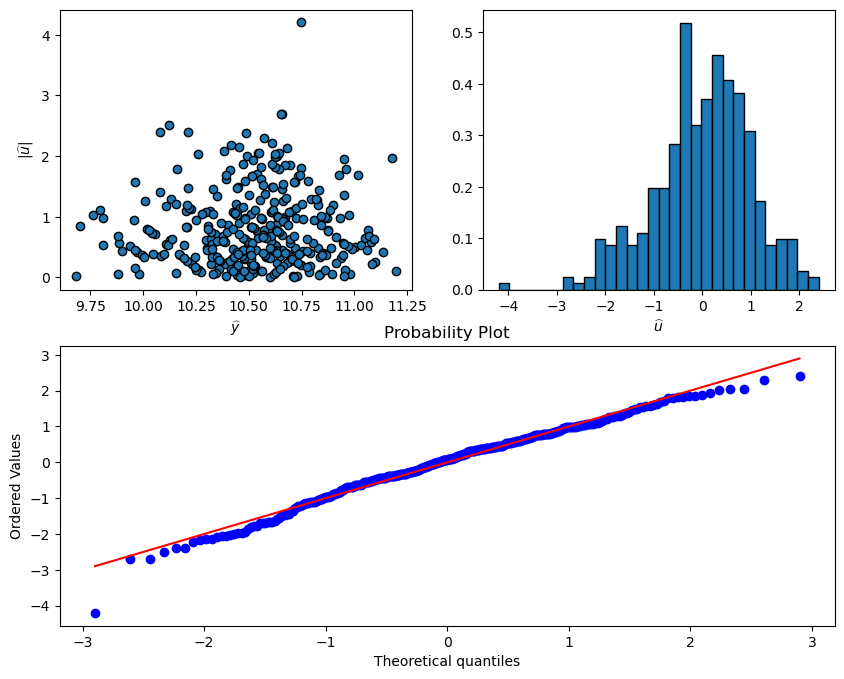

In [74]:
fig = plt.figure(num = 2, figsize = (10, 8))

# graphical analysis of heteroskedasticity:
# Scatterplot of standardized residuals relative to dependent variable
influence_6 = res_all_6.get_influence()
st_residuals_6 = influence_6.resid_studentized_internal

ax = fig.add_subplot(2, 2, 1)
ax.plot(res_all_6.fittedvalues, np.abs(st_residuals_6), linestyle = "None", marker = "o", markeredgecolor = "black")
ax.set_xlabel('$\widehat{y}$')
ax.set_ylabel('$|\widehat{u}|$')

ax = fig.add_subplot(2, 2, 2)
ax.hist(st_residuals_6, bins = 30, edgecolor = "black", density = True)
ax.set_xlabel('$\widehat{u}$')

ax = fig.add_subplot(2, 1, 2)
stats.probplot(st_residuals_6, dist = "norm", plot = ax)

plt.show()

In [76]:
#модель в логарифмах имеет остатки, более похожие на нормальные. В предыдущем графике модель начинала принимать экспоненциальную форму и недооценивала зп

Проверяем на гомоскедастичность

In [79]:
#тест на гомоскедастичностьc Бройнша-Пагана (не отвргается)
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test_3 = het_breuschpagan(resid = res_all_6.resid, exog_het = factors_all_6)
print(pd.DataFrame([np.round(bp_test_3, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0        12.082       0.148    1.523       0.147


In [81]:
#тест уайта
sms.het_white(res_all_2.resid, factors_all_2)

(167.0746800925325,
 0.024213897829194364,
 1.462986053972964,
 0.005789268781393929)

In [83]:
#тест глейзера
model_aux = smf.ols('abs(res_all_6.resid) ~ region + sex + married + experience + profession + education_higher+foreign_language+subordinates+children', data=df)
model_aux_est = model_aux.fit()

# Расчёт статистики
stat_aux = model_aux_est.ess / ((1 - 2 / np.pi) * np.var(res_all_6.resid))

# Критическое значение и p-value
critical_value = chi2.ppf(0.95, df=model_aux.df_model)
p_value = 1 - chi2.cdf(stat_aux, df=model_aux.df_model)

# Вывод результатов
print(f"Stat: {stat_aux:5.4f}, Critical value: {critical_value:5.4f}, p-value: {p_value:5.4f}")

Stat: 12.6868, Critical value: 16.9190, p-value: 0.1773


Ошибки оказваются гетероскедастичными (не)по всем тестам, поэтому применяем устойчивые к гетероскедастичности стандартные ошибки Уайта

In [102]:
income = np.log(df['income'])
factors_all_6 = sm.add_constant(df.drop(columns = ['income','hours','health','working_sphere','experience','married','foreign_language'])).astype(float)
res_all_6 = sm.OLS(income, factors_all_6).fit()
print(res_all_6.get_robustcov_results(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     31.67
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.71e-37
Time:                        11:07:34   Log-Likelihood:                -150.32
No. Observations:                 368   AIC:                             318.6
Df Residuals:                     359   BIC:                             353.8
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.3356      0.104  

In [104]:
#Vif тест
pd.Series([vif(factors_all_6.values, i) for i in range(factors_all_6.shape[1])], index=factors_all_6.columns)

const               25.830831
region               1.007046
sex                  1.142175
children             1.276385
age                  1.255945
subordinates         1.179047
profession           1.650679
own_firm             1.060313
education_higher     1.348362
dtype: float64

# Выбор модели и доп факторы

Это была базовая модель, теперь модифицируем (добавим новые фичи, рассмотрим переменные взаимодействия)

In [108]:
#factors_all_4 = sm.add_constant(df.drop(columns = ['income','experience','hours','health','working_sphere','married','children'])).astype(float)
#res_all_4 = sm.OLS(income_nonlog, factors_all_4).fit()
#print(res_all_4.get_robustcov_results(cov_type='HC3').summary())

In [123]:
df_kp = df.copy()
df_kp['age_squared'] = df_kp['age'] * df_kp['age']

# Построение модели
factors_9 = smf.ols("np.log(income) ~ region + sex + children + age + subordinates + profession + foreign_language + education_higher+age_squared", data=df_kp)
res_all_9 = factors_9.fit()

# Вывод результатов с использованием HC3
print(res_all_9.get_robustcov_results(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(income)   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     30.88
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           8.50e-40
Time:                        11:25:04   Log-Likelihood:                -140.38
No. Observations:                 368   AIC:                             300.8
Df Residuals:                     358   BIC:                             339.8
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.3124      0.251  

In [125]:
df_kp['children_gender'] = df_kp['children'] * df_kp['sex']
factors_10 = sm.add_constant(df_kp.drop(columns = ['income','hours','health','working_sphere','experience','married','foreign_language'])).astype(float)
res_10 = sm.OLS(income, factors_10).fit()
print(res_10.get_robustcov_results(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     28.20
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.30e-39
Time:                        11:25:14   Log-Likelihood:                -135.28
No. Observations:                 368   AIC:                             292.6
Df Residuals:                     357   BIC:                             335.6
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.3031      0.246  

In [ ]:
Statgazer(

Дальше не готово

In [132]:
df_kp['region_sex'] = df_kp['sex'] * df_kp['region']
factors_11 = sm.add_constant(df_kp.drop(columns = ['income','hours','health','working_sphere','experience','married','foreign_language'])).astype(float)
res_11 = sm.OLS(income, factors_11).fit()
print(res_11.get_robustcov_results(cov_type='HC3').summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     28.87
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           4.83e-43
Time:                        11:49:10   Log-Likelihood:                -133.26
No. Observations:                 368   AIC:                             290.5
Df Residuals:                     356   BIC:                             337.4
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.2287      0.240  

In [142]:
Stargazer([res_all_5,res_all_6, res_10,res_11])

In [152]:
pd.Series([vif(factors_10.values, i) for i in range(factors_10.shape[1])], index=factors_10.columns)

const               143.505845
region                1.010475
sex                   3.739054
children              2.249221
age                  48.005111
subordinates          1.192223
profession            1.691104
own_firm              1.067145
education_higher      1.372662
age_squared          45.576674
children_gender       4.308278
dtype: float64

In [156]:
name = ['LM statistic', 'LM p-value', 'F-value', 'F  p-value']
bp_test_4 = het_breuschpagan(resid = res_10.resid, exog_het = factors_10)
print(pd.DataFrame([np.round(bp_test_4, 3)], columns=name))

   LM statistic  LM p-value  F-value  F  p-value
0          6.01       0.814    0.593        0.82


In [ ]:

factors_9 = smf.ols("np.log(income) ~ region + sex + children + age + subordinates + profession + foreign_language + education_higher+RS", data=df_kp)
res_all_9 = factors_9.fit()

# Вывод результатов с использованием HC3
print(res_all_9.get_robustcov_results(cov_type='HC3').summary())

In [ ]:
factors_10 = smf.ols("income ~ region + sex + children + age + subordinates + profession + foreign_language + education_higher+Age_Sex", data=df_kp)
res_all_10 = factors_10.fit()

# Вывод результатов с использованием HC3
print(res_all_8.get_robustcov_results(cov_type='HC3').summary())

In [ ]:
#увеличило R^2, статисчтически значимо, но добавило мульколлинеарность и сдвиг ошибок

In [ ]:
factors_4 = smf.ols("np.log(income) ~ region+sex+married+children+experience+subordinates+profession+foreign_language+education_higher+sex:region", data=df)
res_all_4=factors_4.fit()
print(res_all_4.get_robustcov_results(cov_type='HC3').summary())

In [ ]:
#переменная взяимодействия

In [ ]:
Stargazer([res_all_2, res_all_3,res_all_4])


In [ ]:
#семинар кирилловой
#при возведении фичи в квадрат не стоит пугаться мультиколлинеарности в vif. Это структурная мультиколлинеарность (обусловлена структурным видом нашей модели)
#питон сам борется и регуляризирует

In [ ]:
#перменная взаимодействия
#виф тест должен быть с константой
#тест бокса кокса или тест заремки
#income - переменная номинальная (часто имеет номинальную форму и вообще часто удобнее трактовать в логарифмах) и вообще функц форма мб логарифмическая
#модель в логарифмах имеет остатки, более похожие на нормальные
#мы недооценивали зп (модель экспоненциальная)
#